In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Heart_Disease.csv',na_values='?')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic        
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [3]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [4]:
df.ca.unique()

array([ 0.,  3.,  2.,  1., nan])

In [5]:
df.thal.unique()

array([ 6.,  3.,  7., nan])

In [6]:
imp=SimpleImputer(strategy='most_frequent')
df['ca']=imp.fit_transform(df['ca'].values.reshape(-1,1))
df['thal']=imp.fit_transform(df['thal'].values.reshape(-1,1))
#Handling the null value

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

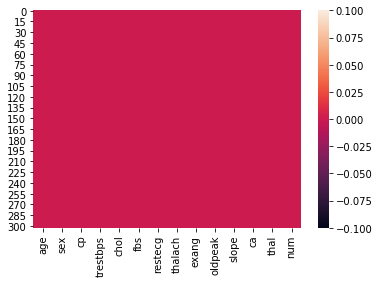

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [11]:
df.shape

(303, 14)

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Observation:1)High standard deviation present for column age,trestbps,chol,restecg means data is very much spredded  2)mean is near of median means data nearly linear  3)IF difference between 75% and max is more means outliers present in that column trestbps,chol,thalach,oldpeak

In [14]:
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [15]:
dfcor=df.corr()

In [16]:
dfcor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


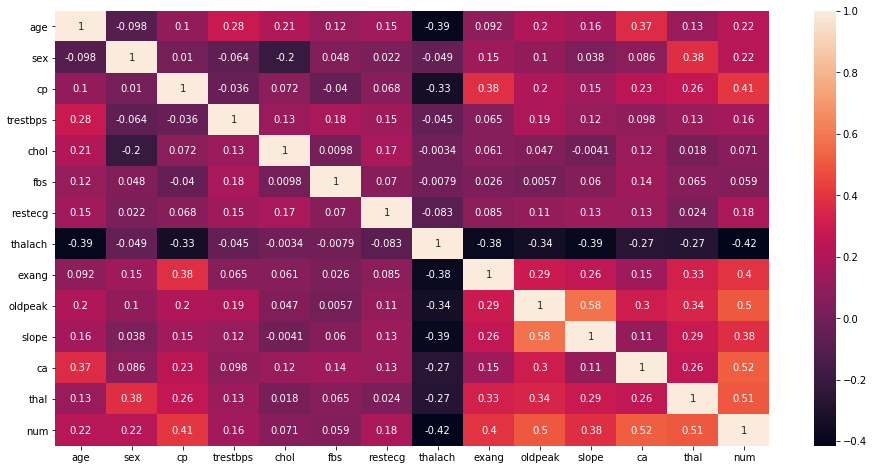

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(dfcor,annot=True)

Observations: ca,thal,oldpeak,cp is highly positively correlated with num
and thalach is highly negatively correlated with num 

# Data Visualization 

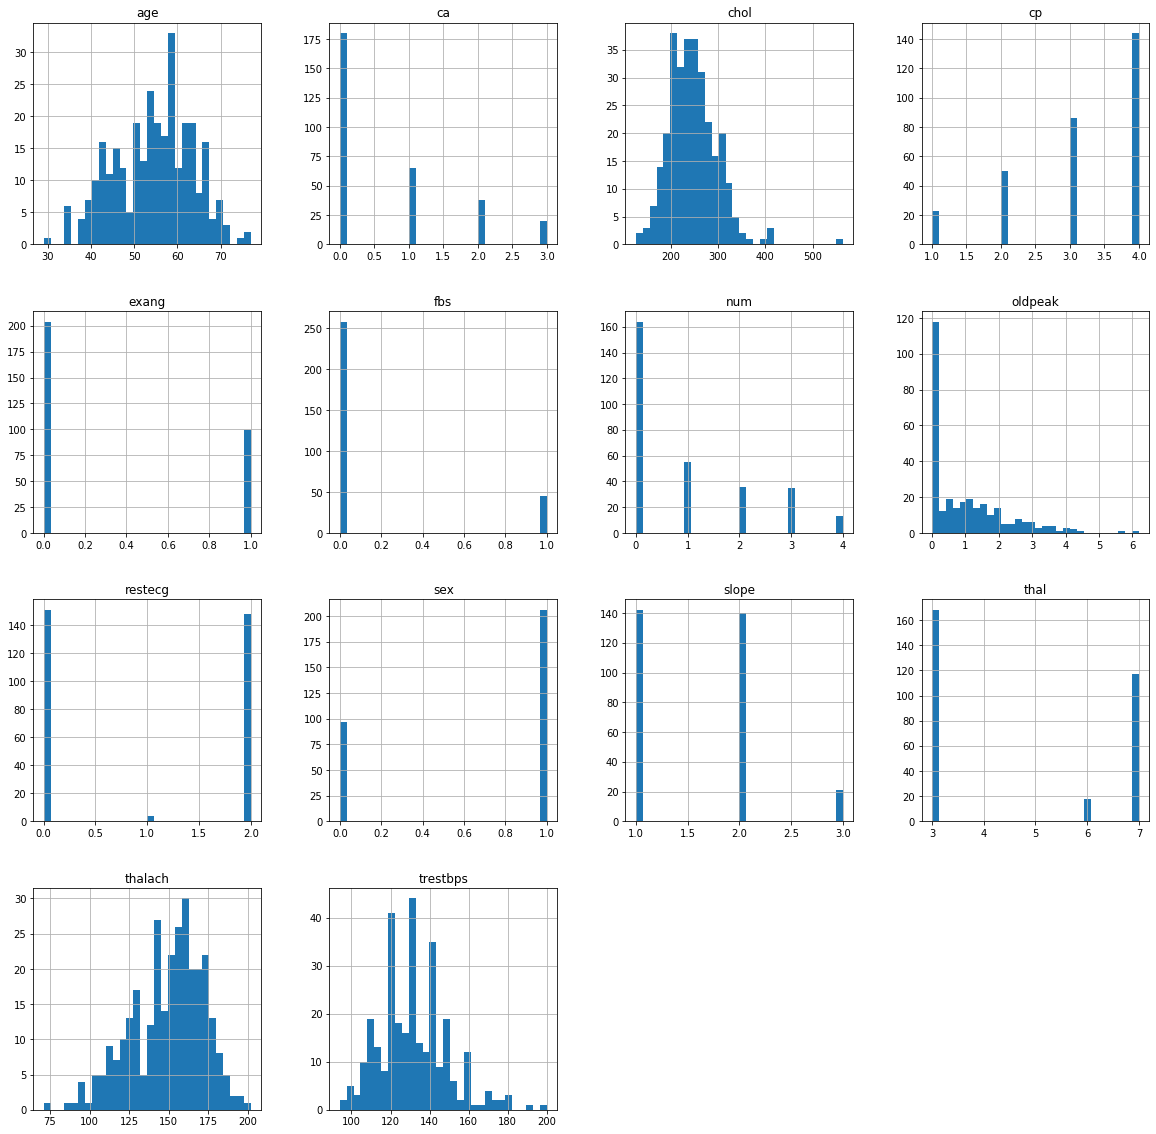

In [18]:
df.hist(bins = 30, figsize=(20,20));

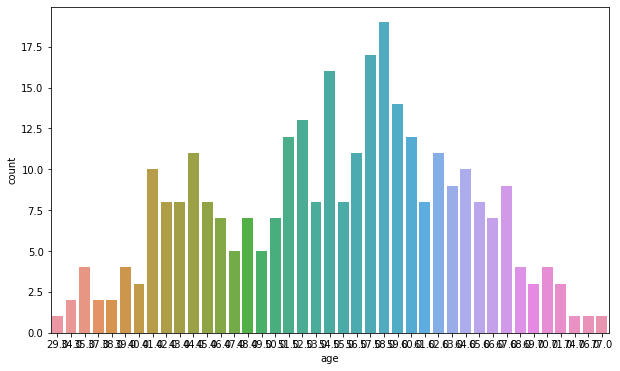

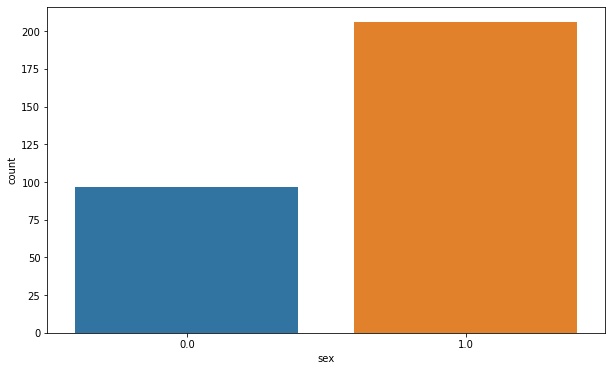

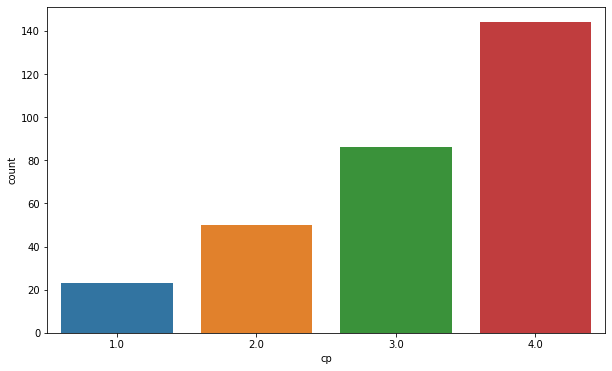

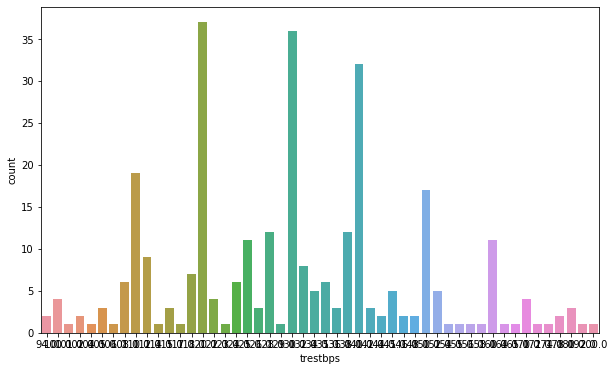

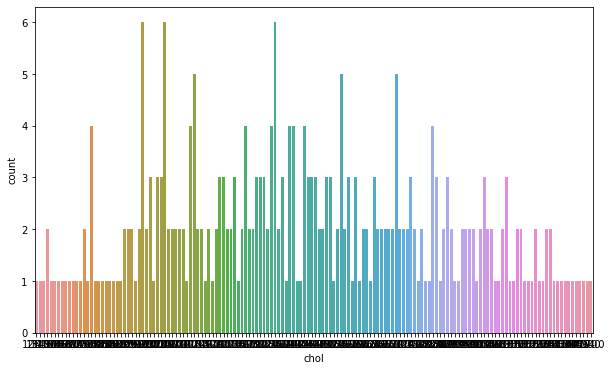

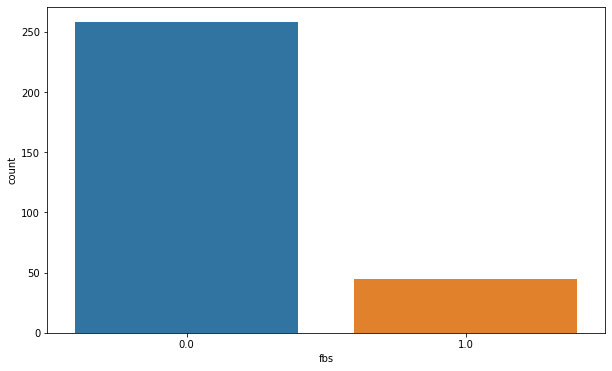

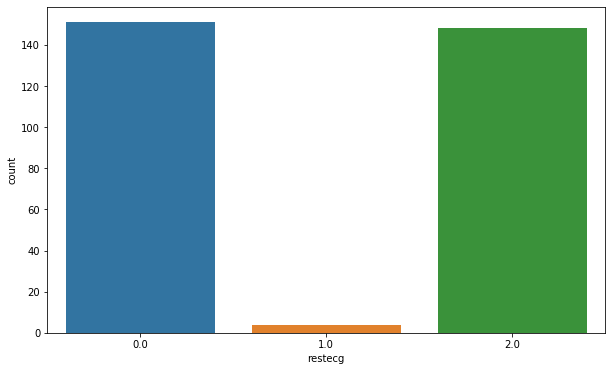

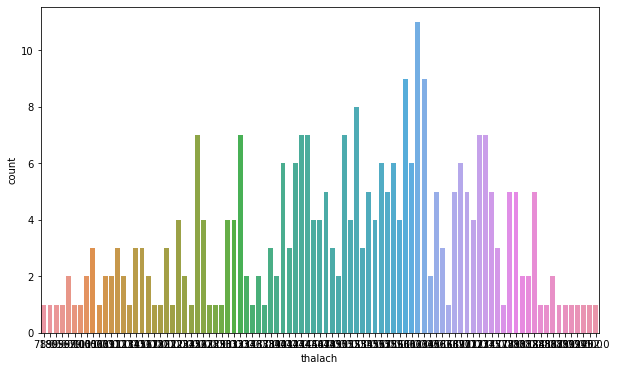

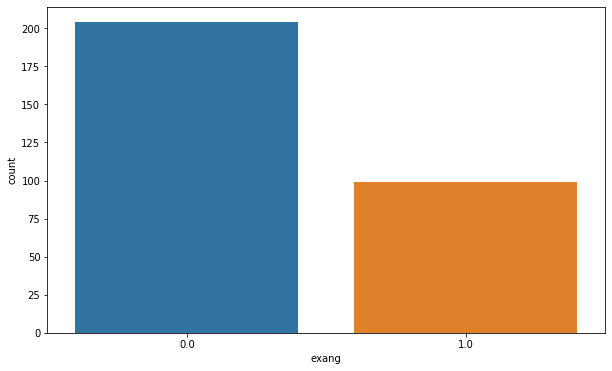

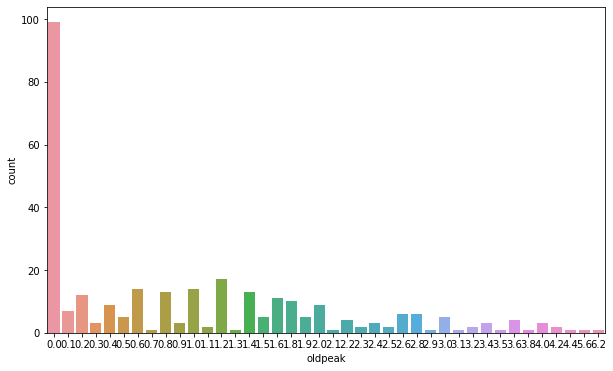

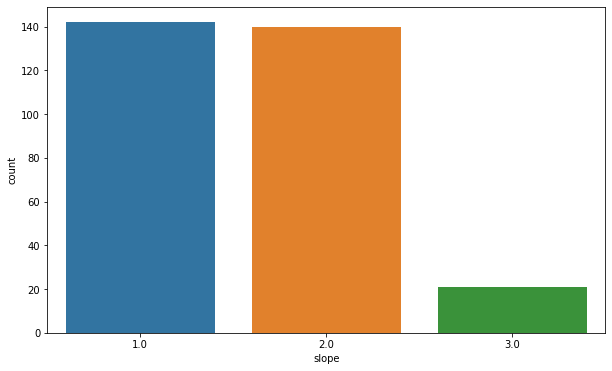

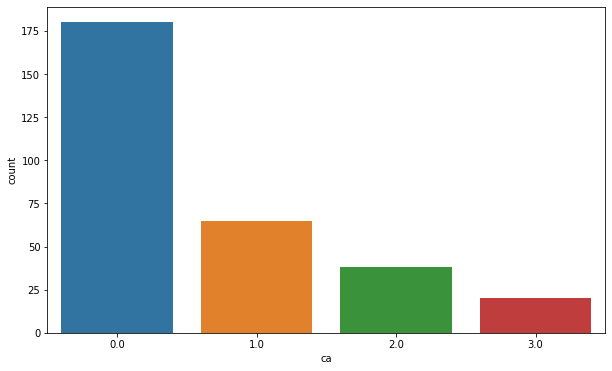

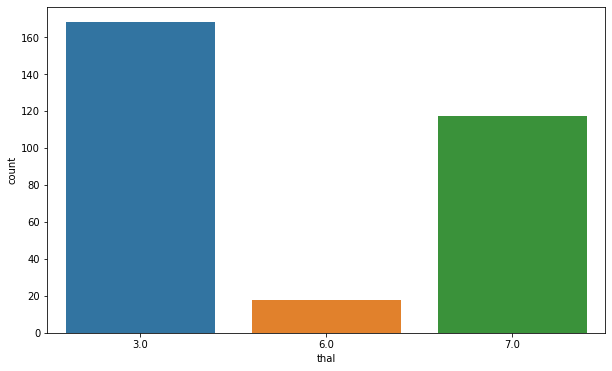

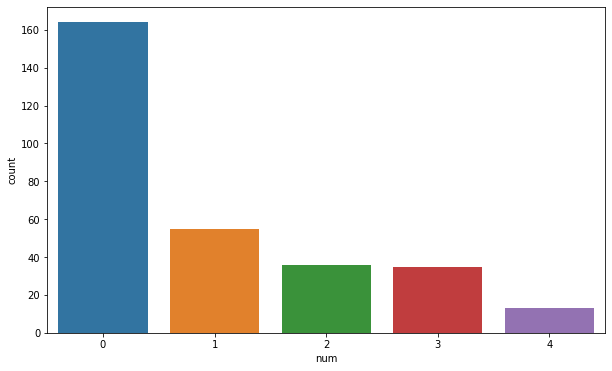

In [19]:
for i in df.columns:
    plt.figure(i,figsize=(10,6))
    sns.countplot(x=df[i])

Observations: Maximum patient as a male, maximum patient are asymptomatic , fasting blood rate is false
    

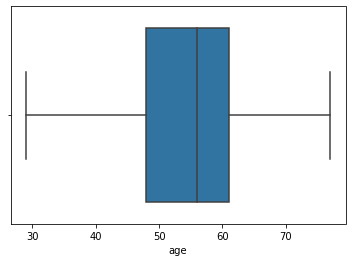

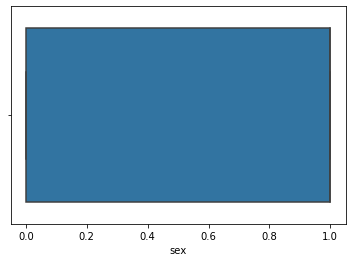

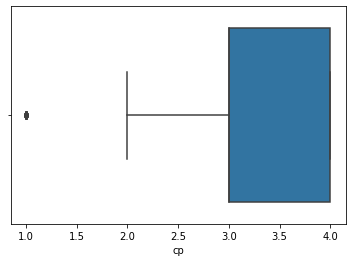

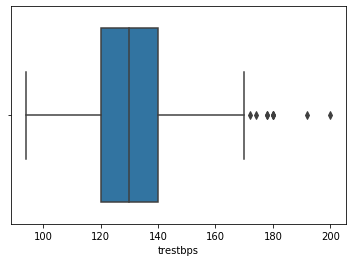

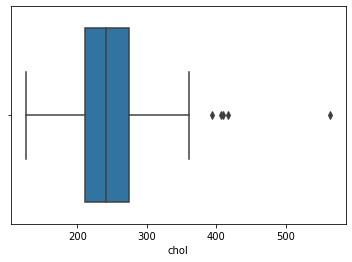

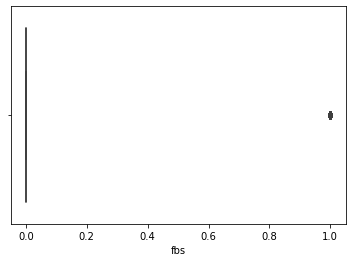

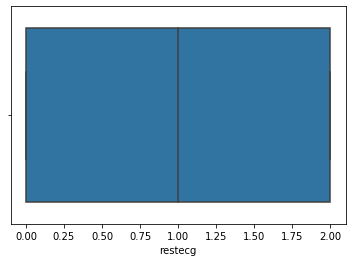

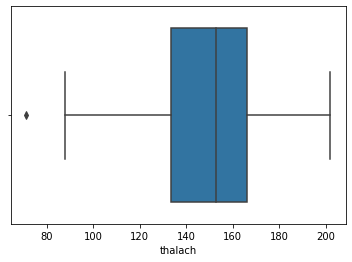

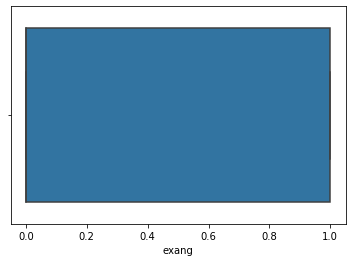

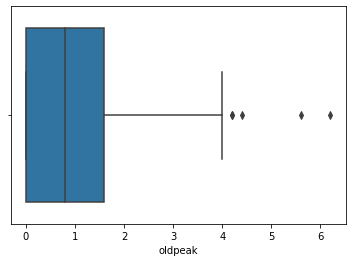

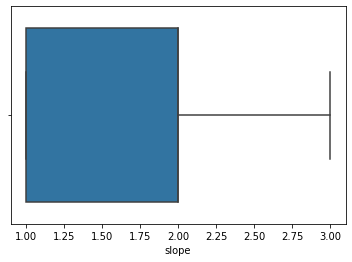

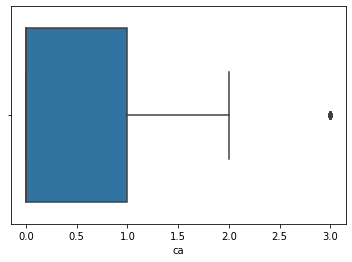

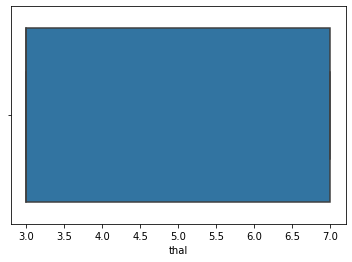

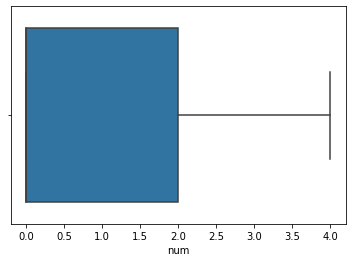

In [20]:
for i in df.columns:
    plt.figure(i)
    sns.boxplot(x=df[i])

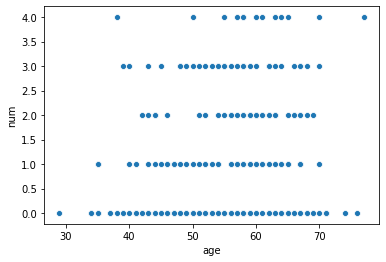

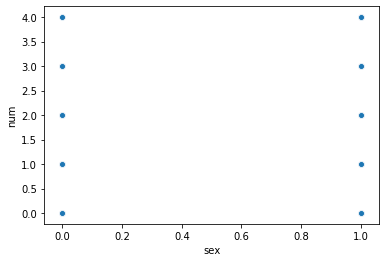

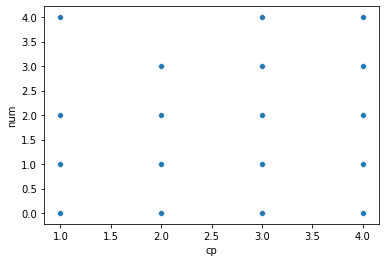

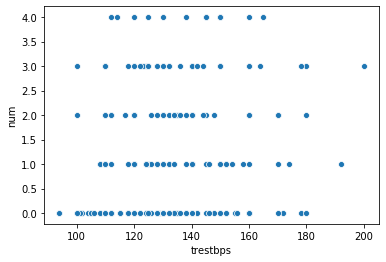

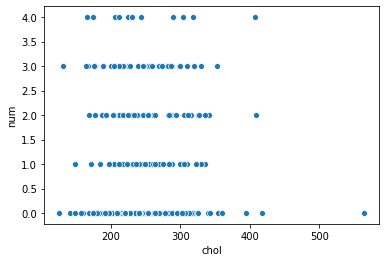

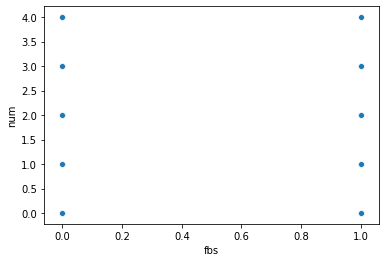

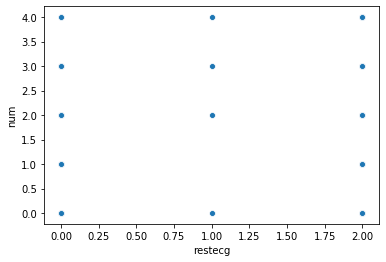

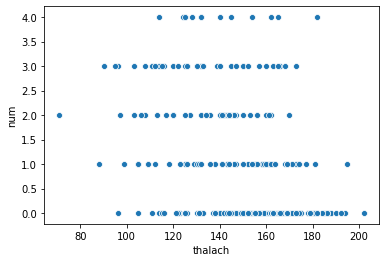

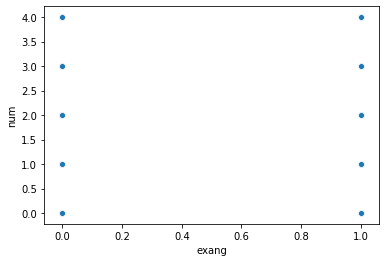

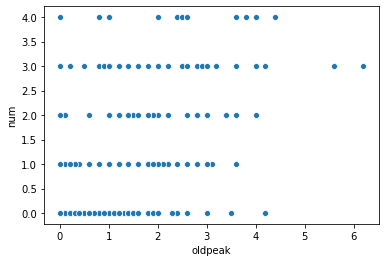

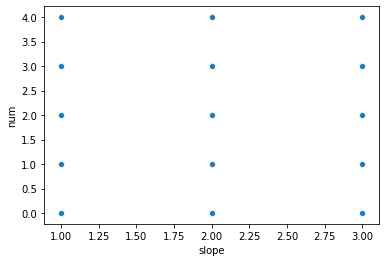

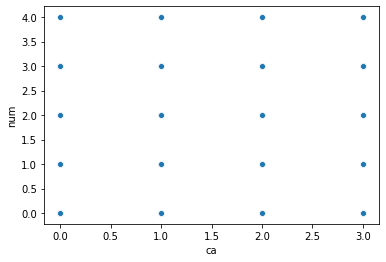

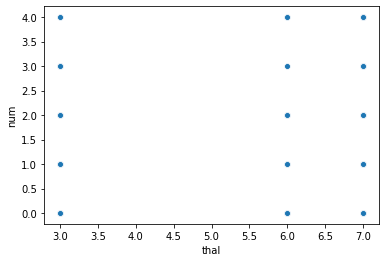

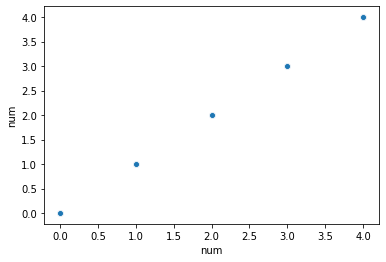

In [21]:
for i in df.columns:
    plt.figure(i)
    sns.scatterplot(x=df[i],y=df['num'])

# To check Distribution of skewness

In [22]:
df.skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.208791
thal        0.256375
num         1.058496
dtype: float64

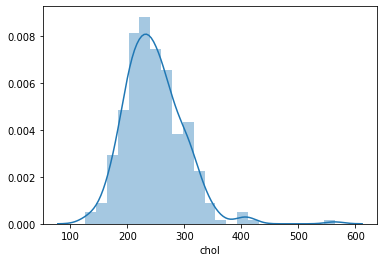

In [23]:
sns.distplot(df['chol'])

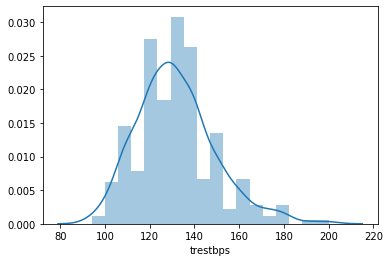

In [24]:
sns.distplot(df['trestbps'])

Removing the outliers

In [25]:
z=np.abs(zscore(df))

In [26]:
z

array([[0.94872647, 0.68620244, 2.25177456, ..., 0.71113139, 0.66000414,
        0.76419779],
       [1.39200191, 0.68620244, 0.87798549, ..., 2.5048807 , 0.89023814,
        0.86644961],
       [1.39200191, 0.68620244, 0.87798549, ..., 1.43287667, 1.17675157,
        0.05112591],
       ...,
       [0.28381332, 0.68620244, 0.87798549, ..., 0.36087264, 1.17675157,
        1.68177331],
       [0.28381332, 1.4572959 , 1.20852121, ..., 0.36087264, 0.89023814,
        0.05112591],
       [1.82174501, 0.68620244, 0.16526786, ..., 0.71113139, 0.89023814,
        0.76419779]])

In [27]:
print(np.where(z>3))

(array([ 48,  91, 121, 123, 126, 152, 181, 188, 245], dtype=int64), array([4, 9, 4, 9, 3, 4, 4, 3, 7], dtype=int64))


In [28]:
df_new=df[(z<3).all(axis=1)]

In [29]:
print(df.shape,'\t',df_new.shape)

(303, 14) 	 (294, 14)


In [30]:
df=df_new

EDA is completed

In [31]:
x=df.drop('num',axis=1)
y=df['num']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [33]:
print(x_train.shape,'\t',x_test.shape)
print(y_train.shape,'\t',y_test.shape)

(220, 13) 	 (74, 13)
(220,) 	 (74,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [35]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),MultinomialNB(),RandomForestClassifier()]
for m in model:
    print(m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score',accuracy_score(y_test,pred))
    print('Confusion Metrix\n',confusion_matrix(y_test,pred))
    print('Classification report\n',classification_report(y_test,pred))
    print('***********************************************************************************')
    print('\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score 0.5540540540540541
Confusion Metrix
 [[33  7  0  0  0]
 [ 7  6  0  0  0]
 [ 1  7  1  0  0]
 [ 1  3  1  1  0]
 [ 2  4  0  0  0]]
Classification report
               precision    recall  f1-score   support

           0       0.75      0.82      0.79        40
           1       0.22      0.46      0.30        13
           2       0.50      0.11      0.18         9
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00         6

    accuracy                           0.55        74
   macro avg       0.49      0.31      0.31        74
weighted avg       0.59      0.55      0.52        74

*******************

In [36]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred))
print('Confusion Metrix\n',confusion_matrix(y_test,pred))
print('Classification report\n',classification_report(y_test,pred))

Accuracy score 0.581081081081081
Confusion Metrix
 [[38  1  1  0  0]
 [ 7  2  4  0  0]
 [ 1  2  2  4  0]
 [ 0  3  2  1  0]
 [ 1  3  1  1  0]]
Classification report
               precision    recall  f1-score   support

           0       0.81      0.95      0.87        40
           1       0.18      0.15      0.17        13
           2       0.20      0.22      0.21         9
           3       0.17      0.17      0.17         6
           4       0.00      0.00      0.00         6

    accuracy                           0.58        74
   macro avg       0.27      0.30      0.28        74
weighted avg       0.51      0.58      0.54        74



In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
CV_rf.fit(x, y)
bestparam=CV_rf.best_params_
print(bestparam)
bestresult=CV_rf.best_score_
print(bestresult)

{'max_features': 'auto', 'n_estimators': 700}
0.6020455873758036


In [38]:
rfscore=cross_val_score(rf,x,y,cv=5)
print('cross validation=',rfscore)
print('mean=',rfscore.mean(),'STD=',rfscore.std())

cross validation= [0.61016949 0.6779661  0.52542373 0.61016949 0.5862069 ]
mean= 0.6019871420222093 STD= 0.04902586335598675


In [39]:
import joblib
joblib.dump(rf,'RF_Heart_Diease.pkl')

['RF_Heart_Diease.pkl']